In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix,  classification_report
from sklearn.datasets import load_boston, load_breast_cancer
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

# set default style
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10,4)})
rcParams['figure.figsize'] = 10,4

# 1. Regression

## 1.1 Linear Regression (OLS)

OLS:
https://towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72

Gradient Descent:
https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# define x and y
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

# 3 unique states
X.nunique() 

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
dtype: int64

In [ ]:
# dummy variables for categorical features
X = pd.concat([X.drop(columns=['State']), pd.get_dummies(X['State'], drop_first=True)], axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [ ]:
# split into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# fit into regressor, the model learns the correlation
# based on the model, generate an equation that can predict output
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)
coeffecients = pd.DataFrame(lm.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
print(coeffecients)

44799.98370805275
                 Coeffecient
R&D Spend           0.779452
Administration      0.020681
Marketing Spend     0.033923
Florida          3251.846324
New York          587.912913


In [ ]:
# predictions, # only need x-test
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

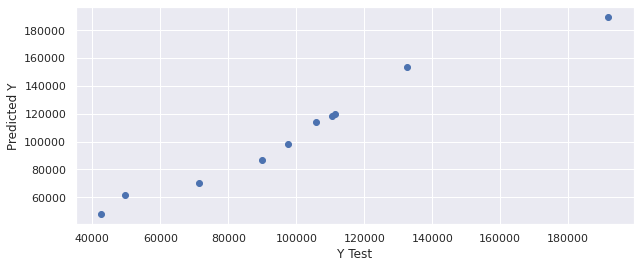

In [ ]:
#plottig
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

3 common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

- **R SQUARE** will always get closer to 1 when have more variables, look at adjusted r square instead

In [ ]:
# evaluation
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7068.31793166009
MSE: 83628721.14419535
RMSE: 9144.874036540654


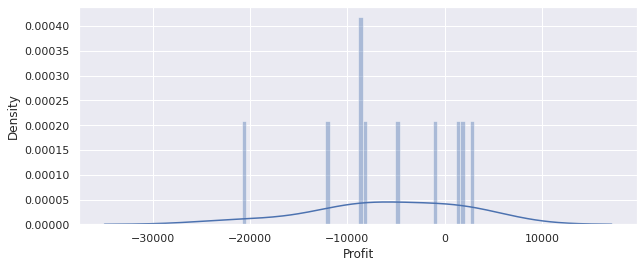

In [ ]:
# Residuals
sns.distplot((y_test-predictions),bins=50);

## 1.2 Ridge Regression

Ridge Regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://www.geeksforgeeks.org/implementation-of-ridge-regression-from-scratch-using-python/

In [ ]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price'] = boston.target
X = boston_df.drop('Price',axis=1)
Y = boston_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# For low value of α, the coefficients are less restricted, 
# α = 0.01 almost same as of linear regression.
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print('LR Train Score', lr.score(X_train, y_train))
print('RR Train Score', rr.score(X_train, y_train))
print('LR Test Score', lr.score(X_test, y_test))
print('RR Test Score', rr.score(X_test, y_test))

rr = Ridge(alpha=100) 
rr.fit(X_train, y_train)
print('\n')
print('RR Train Score', rr.score(X_train, y_train))
print('RR Test Score', rr.score(X_test, y_test))

LR Train Score 0.7419034960343789
RR Train Score 0.7419030253527293
LR Test Score 0.7147895265576851
RR Test Score 0.7146125373123909


RR Train Score 0.7172809669938278
RR Test Score 0.6805765856921936


## 1.3 Lasso Regression
Lasso regression not only helps in reducing over-fitting but it can help us in feature selection

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

https://www.geeksforgeeks.org/implementation-of-lasso-regression-from-scratch-using-python/


In [ ]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X = cancer.data
Y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=31)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lasso = Lasso(alpha=0.01, max_iter=10e5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print('LR Train Score', lr.score(X_train, y_train))
print('Lasso Train Score', lasso.score(X_train, y_train))
print('LR Test Score', lr.score(X_test, y_test))
print('Lasso Test Score', lasso.score(X_test, y_test))
print ("Number of features used: ", np.sum(lasso.coef_!=0))

LR Train Score 0.7842206194055068
Lasso Train Score 0.7037865778498826
LR Test Score 0.7329325010888672
Lasso Test Score 0.6641831577726228
Number of features used:  10


In [ ]:
lasso = Lasso()
lasso.fit(X_train,y_train)
print('Lasso Train Score', lasso.score(X_train, y_train))
print('Lasso Test Score', lasso.score(X_test, y_test))
print ("Number of features used: ", np.sum(lasso.coef_!=0))

Lasso Train Score 0.5600974529893081
Lasso Test Score 0.5832244618818156
Number of features used:  4


## 1.4 Elastic Net Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html


https://www.geeksforgeeks.org/implementation-of-elastic-net-regression-from-scratch/

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X = cancer.data
Y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=31)

In [ ]:
model = ElasticNet()
model.fit(X_train,y_train)
print('ElasticNet Train Score', model.score(X_train, y_train))
print('ElasticNet Test Score', model.score(X_test, y_test))

ElasticNet Train Score 0.6274862888956645
ElasticNet Test Score 0.6330011158645811


## 1.5 Polynomial Regression

https://www.geeksforgeeks.org/polynomial-regression-from-scratch-using-python/

In [3]:
dataset = pd.read_csv(
    'https://raw.githubusercontent.com/lucko515/regression-python/master/Salaries%20based%20on%20Positions%20-%20dataset/Position_Salaries.csv')
x = dataset.iloc[:,1:2]
y = dataset.iloc[:,2]

In [4]:
# train model
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

Text(0, 0.5, 'Salary')

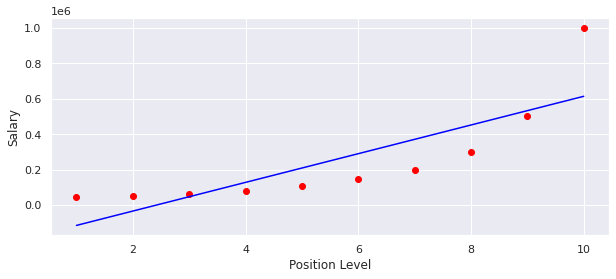

In [5]:
# Visualizing
plt.scatter(x,y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')

In [ ]:
# test variable with different power, degree decide the power values
# x variable has one column, now become three after poly_reg
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(x)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Salary')

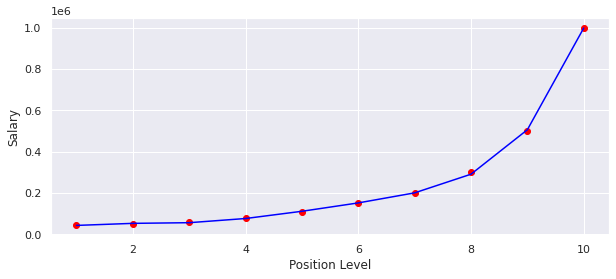

In [ ]:
# Visualizing
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(X_poly), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

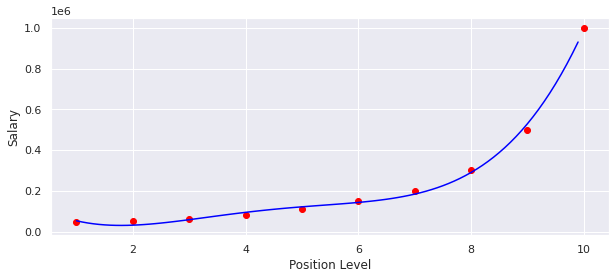

In [ ]:
# to make the graph smoother
# increase the value by 0.1 and test
# smaller increment more accurate, e.g. step = 5 not accurate
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

X_grid = np.arange(min(x.values),max(x.values),0.1)
X_grid = X_grid.reshape((len(X_grid),-1))

plt.scatter(x,y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')

## 1.6 SVR
If we don’t care how large our errors are, as long as they fall within an acceptable range

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

In [6]:
dataset = pd.read_csv(
    'https://raw.githubusercontent.com/lucko515/regression-python/master/Salaries%20based%20on%20Positions%20-%20dataset/Position_Salaries.csv')
x = dataset.iloc[:, 1:2]
y = dataset.iloc[:, 2:3]

In [ ]:
# need feature scaling, as the SVR does not incorporate it 
sc_X = StandardScaler()
sc_Y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_Y.fit_transform(y)

In [ ]:
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0, 0.5, 'Salary')

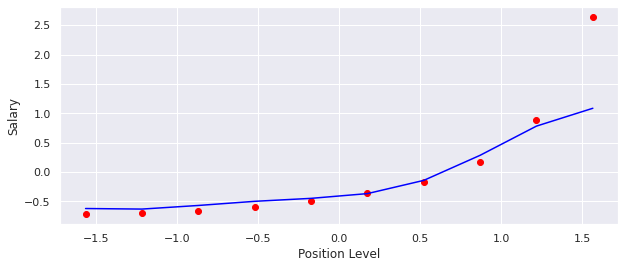

In [ ]:
# SVR make the CEO as outlier as it is too far from the graph
plt.scatter(x,y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')

## 1.7 Decision Tree Regression

https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

In [7]:
dataset = pd.read_csv('https://raw.githubusercontent.com/lucko515/regression-python/master/Salaries%20based%20on%20Positions%20-%20dataset/Position_Salaries.csv')
x = dataset.iloc[:, 1:2]
y = dataset.iloc[:, 2]

In [8]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x,y)

DecisionTreeRegressor(random_state=0)

Text(0, 0.5, 'Salary')

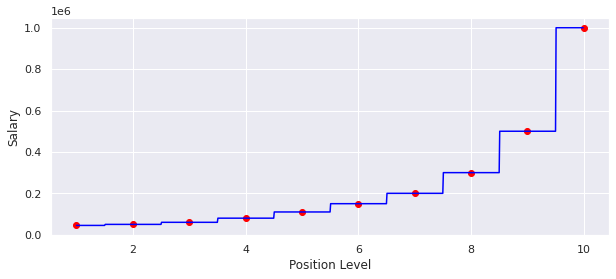

In [9]:
# range of value will share same values, thus step
x_grid = np.arange(min(x.values), max(x.values), 0.01)
x_grid = x_grid.reshape((len(x_grid ),1))

plt.scatter(x,y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')

In [ ]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Text(0, 0.5, 'Salary')

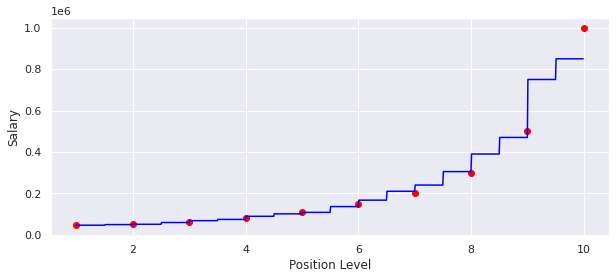

In [ ]:
x_grid = np.arange(min(x.values), max(x.values), 0.01)
x_grid = x_grid.reshape((len(x_grid ),1))

# observed more steps and intervals
plt.scatter(x,y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')

## 1.8 Nearest Neighbors regression

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# 'uniform', assigns equal weights to all points. 
# 'distance' assigns weights proportional to the inverse of the distance
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
model = knn.fit(x, y)
model.predict(x)

array([  45000.,   50000.,   60000.,   80000.,  110000.,  150000.,
        200000.,  300000.,  500000., 1000000.])